# Phase 3 Project 


## 1. Project Setup
- Import necessary libraries (pandas, numpy, sklearn, matplotlib, seaborn)
- Load the dataset
- Set random seed for reproducibility

## 2. Data Exploration and Preprocessing
- Examine the dataset (head, info, describe)
- Check for missing values and handle them
- Explore data distributions and correlations
- Perform feature engineering if necessary
- Split the data into features (X) and target variable(s) (y)

## 3. Logistic Regression
- Prepare the data (ensure binary target variable)
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Plot the ROC curve and calculate AUC
- Analyze coefficients and their significance

## 4. Decision Trees

- Prepare the data
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Visualize the tree structure
- Analyze feature importance

## 5. Model Comparison

- Compare performance metrics across all models
- Discuss strengths and weaknesses of each approach
- Recommend the best model(s) for the problem at hand

## 6. Conclusion and Future Work
- Summarize key findings
- Discuss limitations of the current approach
- Suggest potential improvements or additional models to try

## Student details
Nduku Kitenge
DSC-PT07 


## Business Problem

The goal of this project is to predict which pumps are functional, which need some repairs and which dont work at all. 

The challenge from DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table  with data from Taarifa and the Tanzanian Ministry of Water. The goal of this project is to predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.



## 1. Project Setup
- Import necessary libraries (pandas, numpy, sklearn, matplotlib, seaborn)
- Load the dataset

In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Load training dataset
sub_merged_df = pd.read_csv('./SubmissionFormat.csv',index_col=0)
training_merged_df = pd.read_csv('./TrainingSetValues.csv',index_col=0)
test_merged_df = pd.read_csv('./TestSetValues.csv',index_col=0)
t_label_merged_df = pd.read_csv('TrainingSetLabels.csv',index_col=0)




## 2. Data Exploration and Preprocessing
- Examine the dataset (head, info, describe)
- Check for missing values and handle them
- Explore data distributions and correlations
- Perform feature engineering eg. add pump age
- Split the data into features (X) and target variable(s) (y)

In [3]:
# Function to display dataset info
def display_dataset_info(merged_df, name):
    print(f"\n=== {name} ===")
    print(f"Shape: {merged_df.shape}")
    print("\nInfo:")
    print(merged_df.info())
    print("\nDescription:")
    print(merged_df.describe())
    print("\nHead:")
    print(merged_df.head())
    print("\n" + "="*40)

# Display info for each dataset
display_dataset_info(sub_merged_df, "Submission Format")
display_dataset_info(training_merged_df, "Training Set Values")
display_dataset_info(test_merged_df, "Test Set Values")
display_dataset_info(t_label_merged_df, "Training Set Labels")


=== Submission Format ===
Shape: (14850, 1)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  14850 non-null  object
dtypes: object(1)
memory usage: 232.0+ KB
None

Description:
           status_group
count             14850
unique                1
top     predicted label
freq              14850

Head:
          status_group
id                    
50785  predicted label
51630  predicted label
17168  predicted label
45559  predicted label
49871  predicted label


=== Training Set Values ===
Shape: (59400, 39)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 no

In [4]:
#check for missing values in training dataset
training_merged_df.isna().sum()



amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

## Dropping columns and reasons why:
- Scheme name - Too many null values 
- wpt_name - Too many unique values
- management - management group covers this
- quality group - quality covers this
- quantity group
- extracton type group 

Numerical columns:
- num private - dont know what this means. 

Observations
- Funder and installer are similar, but funder has less null values than installer. 
- Waterpoint type and water point are similar - Will drop waterpoint type. 



In [5]:
#Check categorical columns
training_merged_df.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [6]:
#check numerical columns
training_merged_df.select_dtypes(include=['int64', 'float64']).columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')

In [7]:
#Define the list of columns to drop
columns_drop = ['date_recorded', 'funder', 'wpt_name', 'subvillage', 'lga', 
 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 
 'extraction_type_group', 'management', 'payment', 'quality_group', 
 'quantity', 'source', 'source_type', 'waterpoint_type', 'num_private', 
 'region_code', 'district_code']

# Drop unnecessary columns
training_merged_df = training_merged_df.drop(columns_drop,axis=1)

#Print remaining columns
print(training_merged_df.columns)

Index(['amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_class', 'waterpoint_type_group'],
      dtype='object')


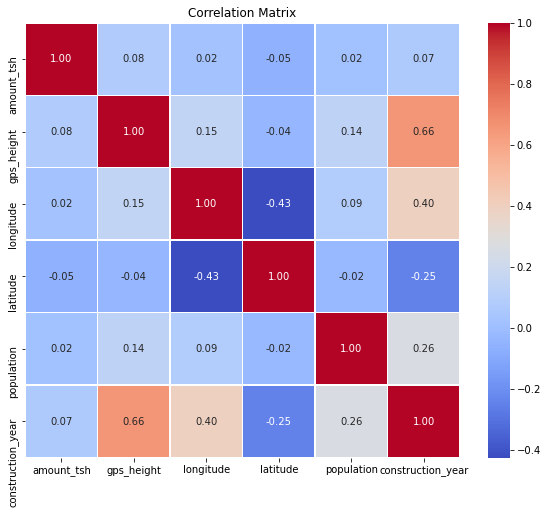

In [8]:
#explore data distrubitions and correlations of the numerical- training data
corr_matrix = training_merged_df.corr()

# Plot the correlation matrix using Seaborn for numerical values.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# merge with training labels data using ID as connector
merged_df = pd.merge(training_merged_df, t_label_merged_df, on='id', how='outer', indicator=True)
print(merged_df.head(20))

       amount_tsh  gps_height             installer  longitude   latitude  \
id                                                                          
69572      6000.0        1390                 Roman  34.938093  -9.856322   
8776          0.0        1399               GRUMETI  34.698766  -2.147466   
34310        25.0         686          World vision  37.460664  -3.821329   
67743         0.0         263                UNICEF  38.486161 -11.155298   
19728         0.0           0               Artisan  31.130847  -1.825359   
9944         20.0           0                   DWE  39.172796  -4.765587   
19816         0.0           0                  DWSP  33.362410  -3.766365   
54551         0.0           0                   DWE  32.620617  -4.226198   
53934         0.0           0             Water Aid  32.711100  -5.146712   
46144         0.0           0               Artisan  30.626991  -1.257051   
49056         0.0          62               Private  39.209518  -7.034139   

In [10]:
#check for missing values in merged dataset
merged_df.isna().sum()

amount_tsh                  0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity_group              0
source_class                0
waterpoint_type_group       0
status_group                0
_merge                      0
dtype: int64

In [11]:
#Treat null values
missing_value_columns = ['installer', 'public_meeting', 'scheme_management', 'permit']

# Check the value counts
for col in missing_value_columns:
    print(merged_df[col].value_counts())

DWE                          17402
Government                    1825
RWE                           1206
Commu                         1060
DANIDA                        1050
                             ...  
Mahemba                          1
Hearts helping hands.Inc.        1
WBK                              1
Muwaza                           1
Winkyens                         1
Name: installer, Length: 2145, dtype: int64
True     51011
False     5055
Name: public_meeting, dtype: int64
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64
True     38852
False    17492
Name: permit, dtype: int64


In [12]:
# Remove rows with missing values in 'funder', 'installer' and 'scheme_management' columns
merged_df.dropna(subset=['installer', 'scheme_management'], axis=0, inplace=True)

Replacing the missing values for public meeting and permit with False. Assuming that the information doesnt exist. 

In [13]:
# Fill missing values in public meeting and permit'
for col in ['public_meeting', 'permit']:
    merged_df[col] = merged_df[col].fillna(False)




Remove dimensionality of unique values in installer column

In [14]:
# Replace close variations and misspellings in the installer column

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE'), value ='DWE')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
merged_df['installer'] = merged_df['installer'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

merged_df['installer'] = merged_df['installer'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

merged_df['installer'] = merged_df['installer'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='Unknown')

In [15]:
# Confirm there are no more missing values
merged_df.isna().sum()

amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
water_quality            0
quantity_group           0
source_class             0
waterpoint_type_group    0
status_group             0
_merge                   0
dtype: int64

In [16]:
# Ensure the 'installation_year' is in numeric format (not datetime, just the year)
merged_df['construction_year'] = pd.to_numeric(training_merged_df['construction_year'], errors='coerce')

# Calculate pump age
current_year = pd.Timestamp.now().year
merged_df['pump_age'] = current_year - merged_df['construction_year']

# Handle cases where installation_year might be missing or incorrect (e.g., 0 or negative values)
merged_df['pump_age'] = merged_df['pump_age'].apply(lambda x: x if x > 0 else None)

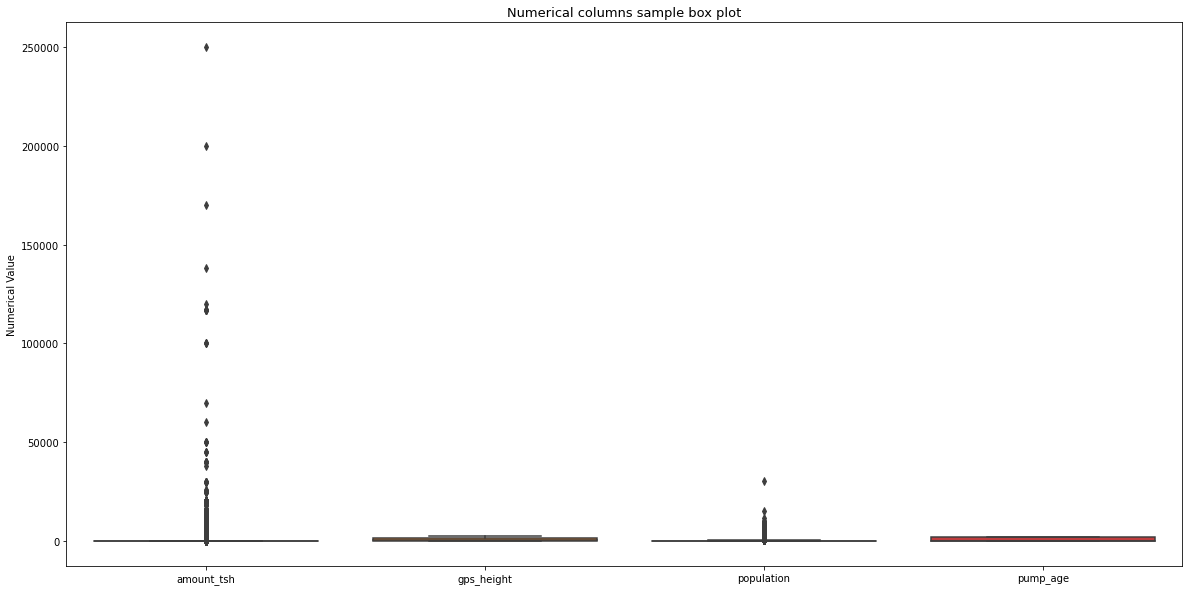

In [17]:
# Plotting box plots of some numerical columns
columns = ['amount_tsh', 'gps_height', 'population','pump_age']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[merged_df[col] for col in columns])
plt.title("Numerical columns sample box plot", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,4), columns)
plt.show()

In [18]:
# Check whether there are duplicates
merged_df.duplicated(keep = 'first').sum()


1243

In [19]:
# Change the data type of public_meeting and permit columns to binary for classification
merged_df[['public_meeting', 'permit']] = merged_df[['public_meeting', 'permit']].astype(int)
# Check the new data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51927 entries, 69572 to 26348
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             51927 non-null  float64 
 1   gps_height             51927 non-null  int64   
 2   installer              51927 non-null  object  
 3   longitude              51927 non-null  float64 
 4   latitude               51927 non-null  float64 
 5   basin                  51927 non-null  object  
 6   region                 51927 non-null  object  
 7   population             51927 non-null  int64   
 8   public_meeting         51927 non-null  int32   
 9   scheme_management      51927 non-null  object  
 10  permit                 51927 non-null  int32   
 11  construction_year      51927 non-null  int64   
 12  extraction_type_class  51927 non-null  object  
 13  management_group       51927 non-null  object  
 14  payment_type           51927 non-n

Explore data distributions

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


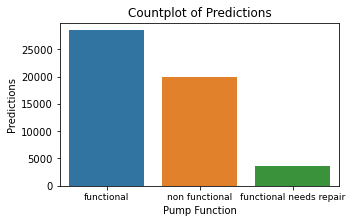

In [20]:
# Plot distribution of target variable.
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(merged_df['status_group'])
x_labels = merged_df['status_group'].unique()

# Add labels
plt.title('Countplot of Predictions')
plt.xlabel('Pump Function')
ax.set_xticklabels(x_labels, fontsize=9)
plt.ylabel('Predictions')
plt.show()

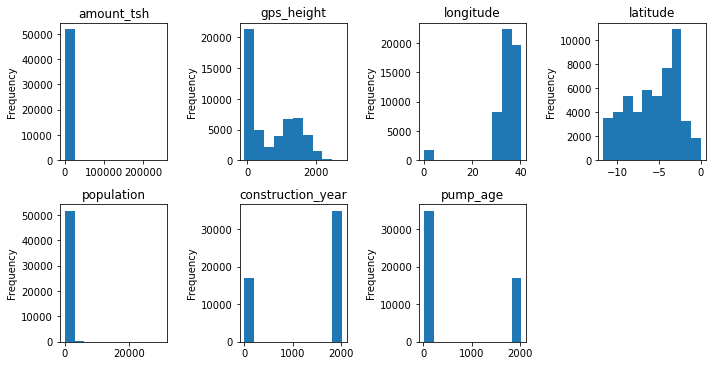

In [21]:
# Histogram of continuous variables
continuous = ['amount_tsh','gps_height','longitude','latitude','population','construction_year','pump_age']
fig = plt.figure(figsize=(10, 10))
for i, col in enumerate(continuous):
    ax = plt.subplot(4, 4, i+1)
    merged_df[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.show()

## 3. Logistic Regression
- Prepare the data (ensure binary target variable)
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Plot the ROC curve and calculate AUC
- Analyze coefficients and their significance

In [22]:
# Assign status_group column to y series
y = merged_df['status_group']

# Drop status_group and _merge to create X dataframe
X = merged_df.drop(['status_group','_merge'], axis=1)

# Print first 5 rows of X
X.head()

,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,pump_age
id,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,Roman Catholic Church,34.938093,-9.856322,Lake Nyasa,Iringa,109,1,VWC,0,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe,25
8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,280,0,Other,1,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,14
34310,25.0,686,World Vision,37.460664,-3.821329,Pangani,Manyara,250,1,VWC,1,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe,15
67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,1,VWC,1,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,38
9944,20.0,0,DWE,39.172796,-4.765587,Pangani,Tanga,1,1,VWC,1,2009,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,15


In [23]:
#Check categorical columns in merged set
merged_df.select_dtypes(include=['object']).columns

Index(['installer', 'basin', 'region', 'scheme_management',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity_group', 'source_class',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [24]:
#check numerical columns in merged set
merged_df.select_dtypes(include=['int64', 'float64']).columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'construction_year', 'pump_age'],
      dtype='object')

In [25]:
# Create lists of categorical, numerical, and binary columns
category_column = ['installer', 'basin', 'region', 'scheme_management',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity_group', 'source_class',
       'waterpoint_type_group',]

numerical_column = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'construction_year', 'pump_age']

binary_column = ['public_meeting', 'permit']

In [26]:
#create dummies for categorical colums
X= pd.get_dummies(X, columns=category_column)
X

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,pump_age,installer_-,...,quantity_group_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,109,1,0,1999,25,0,...,0,1,0,0,0,1,0,0,0,0
8776,0.0,1399,34.698766,-2.147466,280,0,1,2010,14,0,...,0,0,1,0,0,1,0,0,0,0
34310,25.0,686,37.460664,-3.821329,250,1,1,2009,15,0,...,0,0,1,0,0,1,0,0,0,0
67743,0.0,263,38.486161,-11.155298,58,1,1,1986,38,0,...,0,1,0,0,0,1,0,0,0,0
9944,20.0,0,39.172796,-4.765587,1,1,1,2009,15,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,500.0,351,37.634053,-6.124830,89,1,1,2007,17,0,...,0,1,0,0,0,1,0,0,0,0
60739,10.0,1210,37.169807,-3.253847,125,1,1,1999,25,0,...,0,1,0,0,0,1,0,0,0,0
27263,4700.0,1212,35.249991,-9.070629,56,1,1,1996,28,0,...,0,0,1,0,0,1,0,0,0,0


## 4. Decision Trees

- Prepare the data
- Create and train the model
- Make predictions on the test set
- Evaluate the model (accuracy, precision, recall, F1-score)
- Visualize the tree structure
- Analyze feature importance



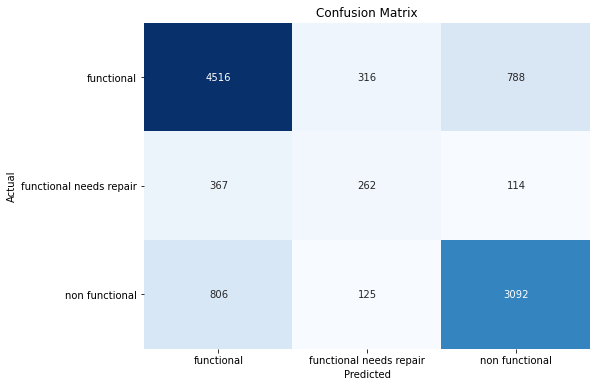

Accuracy: 0.7577508184093973
Classification Report:
                          precision    recall  f1-score   support

             functional       0.79      0.80      0.80      5620
functional needs repair       0.37      0.35      0.36       743
         non functional       0.77      0.77      0.77      4023

               accuracy                           0.76     10386
              macro avg       0.65      0.64      0.64     10386
           weighted avg       0.76      0.76      0.76     10386

Confusion Matrix:
 [[4516  316  788]
 [ 367  262  114]
 [ 806  125 3092]]


In [27]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Interpretation of findings from decision tree: 
## 1. **Overall Accuracy**:
   - **Accuracy**: 0.76 (76%) means that 76% of the water pumps were correctly classified as either functional, needing repair, or non-functional. While this is a decent result, it can still improve, particularly in distinguishing between the different classes.

## 2. **Precision, Recall, and F1-Score**:

   - **Functional Pumps**:
     - **Precision**: 0.79 (79%) means that, when the model predicted a pump to be functional, 79% of the time, it was correct.
     - **Recall**: 0.80 (80%) means that the model correctly identified 80% of the truly functional pumps.
     - **F1-Score**: 0.80 indicates a good balance between precision and recall, reflecting strong performance for this class.
   
   - **Functional but Needs Repair**:
     - **Precision**: 0.37 (37%) shows that when the model predicted a pump to need repairs, it was only correct 37% of the time. This indicates a high number of false positives for this class.
     - **Recall**: 0.35 (35%) means that the model only identified 35% of the pumps that actually need repair.
     - **F1-Score**: 0.36 indicates weak performance, as the model struggles to accurately classify pumps that need repair. This suggests that this class is the most challenging for the model to predict.

   - **Non-Functional Pumps**:
     - **Precision**: 0.77 (77%) means that when the model predicted a pump was non-functional, 77% of the predictions were correct.
     - **Recall**: 0.77 (77%) shows that the model correctly identified 77% of the truly non-functional pumps.
     - **F1-Score**: 0.77 indicates solid performance for this class, similar to the functional pumps.

## 3. **Macro and Weighted Averages**:
   - **Macro Average**: These metrics are the unweighted averages across all classes:
     - **Precision**: 0.65 (65%)
     - **Recall**: 0.64 (64%)
     - **F1-Score**: 0.64 (64%)
     - These lower values indicate that the model performs worse on minority classes, particularly on pumps that need repair.
   
   - **Weighted Average**: These metrics are weighted by the number of samples in each class:
     - **Precision**: 0.76 (76%)
     - **Recall**: 0.76 (76%)
     - **F1-Score**: 0.76 (76%)
     - These values are higher since the model performs well on the majority class (`functional`), which has a larger representation in the dataset.

## 4. **Confusion Matrix**:
   - **Functional Pumps**: Out of 5,620 actual functional pumps, the model correctly predicted 4,516, but misclassified 788 as non-functional and 316 as needing repair.
   - **Functional but Needs Repair**: Out of 743 pumps that needed repair, only 262 were correctly classified. The model misclassified 367 as functional and 114 as non-functional.
   - **Non-Functional Pumps**: Out of 4,023 non-functional pumps, the model correctly predicted 3,092, but misclassified 806 as functional and 125 as needing repair.

## Key Insights:
1. **Strength**: The model performs well on the majority classes (`functional` and `non-functional` pumps), achieving around 77-80% accuracy in both precision and recall.
   
2. **Weakness**: The model struggles significantly with the `functional needs repair` class, showing poor performance with a precision of 37% and recall of 35%. This indicates that the model has difficulty distinguishing pumps that require minor repairs from those that are functional or non-functional.


